# **Lab: Hyper-Parameter Optimization with PCA**

Downloading packages

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Downloading the data

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
data = load_wine()

print('Feature:',data.feature_names)
print('Target:',data.target_names)

Feature: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target: ['class_0' 'class_1' 'class_2']


In [3]:
X = data.data
y = data.target

print('Numer of Samples:',np.shape(X)[0])
print('Numer of Features:',np.shape(X)[1])
print('Number of classes:',np.size(np.unique(y)))

Numer of Samples: 178
Numer of Features: 13
Number of classes: 3


Performing PCA for Visualization

In [4]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
scaling.fit(X)
Xs = scaling.transform(X)
print(Xs)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [5]:
from sklearn.decomposition import PCA

ncomp = 2
pca = PCA(n_components=2,svd_solver='randomized',whiten=True)
pca.fit(Xs)
Z = pca.transform(Xs)
print(Z)

[[ 1.52465094 -0.91090938]
 [ 1.01565144  0.21039044]
 [ 1.15690036 -0.65071682]
 [ 1.72705576 -1.7394321 ]
 [ 0.46377716 -0.54891417]
 [ 1.40214709 -1.33935935]
 [ 1.12580265 -0.74139921]
 [ 0.94668624 -1.01534988]
 [ 1.15420394 -0.5793565 ]
 [ 1.26579355 -0.49818136]
 [ 1.59957262 -0.82184851]
 [ 0.80662848 -0.38619344]
 [ 0.97152078 -0.42641026]
 [ 1.58965274 -0.7134936 ]
 [ 1.98250951 -1.3226833 ]
 [ 1.05965372 -1.04916746]
 [ 0.99840893 -1.46866587]
 [ 0.87292303 -1.0294892 ]
 [ 1.6281871  -1.58922223]
 [ 0.95821752 -0.66964015]
 [ 1.43623188 -0.49657809]
 [ 0.4994768  -0.15255433]
 [ 1.1653971   0.05795683]
 [ 0.75617167  0.3258022 ]
 [ 0.80976487  0.20013954]
 [ 0.45512163 -0.59361615]
 [ 0.81606333 -0.43301669]
 [ 0.56790227  0.05667346]
 [ 1.00597119 -0.4351588 ]
 [ 1.03709288 -0.12082373]
 [ 1.14930636 -0.78303881]
 [ 1.2307579  -0.92883843]
 [ 0.74862865 -0.03325956]
 [ 0.87463291 -1.03055673]
 [ 0.64833034 -0.4404374 ]
 [ 0.87515482 -0.11151493]
 [ 0.63659636 -0.41564029]
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


Text(0, 0.5, 'PC2')

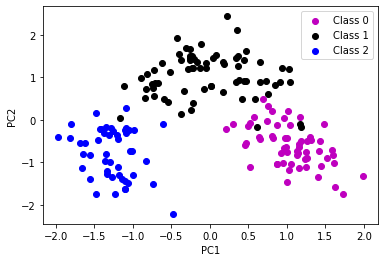

In [6]:
class_0=np.where(y==0)
class_1=np.where(y==1)
class_2=np.where(y==2)
for i in class_0:
    plt.scatter(Z[i,0], Z[i,1],c='m',label='Class 0')
for i in class_1:
    plt.scatter(Z[i,0], Z[i,1],c='k',label='Class 1')
for i in class_2:
    plt.scatter(Z[i,0], Z[i,1],c='B',label='Class 2')
plt.legend() 
plt.xlabel('PC1')
plt.ylabel('PC2')

[28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618   6.33958815  5.48097635
  4.28967045]
[28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618   6.33958815  5.48097635
  4.28967045]


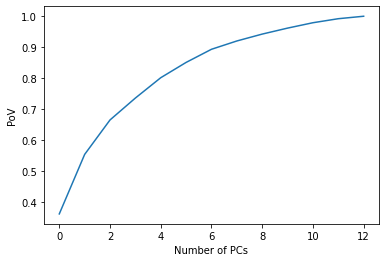

In [7]:
nfeatures = np.shape(Xs)[1]
pca = PCA(n_components=nfeatures,svd_solver='randomized',whiten=True)
pca.fit(Xs)
Z_new = pca.transform(Xs)
print(pca.singular_values_)
PoV = np.cumsum(pca.singular_values_**2)/np.sum(pca.singular_values_**2)
plt.plot(PoV)
plt.xlabel('Number of PCs', fontsize=10)
plt.ylabel('PoV', fontsize=10)

print(pca.singular_values_)

**Using PCA with Classification**

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5

kf = KFold(n_splits=nfold)
kf.get_n_splits(X)

ncomp_test = np.arange(2,12)
num_nc = len(ncomp_test)

acc = np.zeros((num_nc,nfold))

for icomp, ncomp in enumerate(ncomp_test):
    
    for ifold, I in enumerate(kf.split(X)):
        Itr, Its = I
        
        Xtr, Xts, ytr, yts = X[Itr], X[Its], y[Itr], y[Its]

        scaler = StandardScaler()
        scaler.fit(Xtr)
        Xs_tr = scaler.transform(Xtr)
        
        pca = PCA(n_components=ncomp, svd_solver='randomized', whiten=True)
        pca.fit(Xs_tr)
        Z_tr = pca.transform(Xs_tr)
        
        logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
        logreg.fit(Z_tr, ytr)
        
        Xs_new = scaler.transform(Xts)
        Z_new = pca.transform(Xs_new)
        
        yhat = logreg.predict(Z_new)

        
        acc[icomp, ifold] = np.mean(yhat == yts)

[0.92714286 0.92174603 0.93301587 0.91619048 0.93269841 0.94952381
 0.94952381 0.94968254 0.94428571 0.95539683]
[0.01414035 0.02023047 0.0240891  0.01941867 0.00655135 0.01035585
 0.01035585 0.01364433 0.0195863  0.01662769]
(10,)
Opt Acc: 0.9553968253968254
Selected order using normal rule is 11


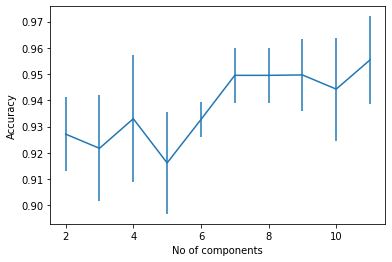

In [9]:
acc_mean = np.mean(acc,axis=1)
print(acc_mean)
acc_se =np.std(acc,axis=1)/np.sqrt(nfold-1)
print(acc_se)
print(ncomp_test.shape)
plt.errorbar(ncomp_test,acc_mean,yerr=acc_se,fmt='-')
plt.xlabel('No of components')
plt.ylabel('Accuracy')

imax = np.argmax(acc_mean)
print('Opt Acc:',np.max(acc_mean))
print("Selected order using normal rule is {0:d}".format(ncomp_test[imax]))

1 SE rule, order = 7
Accuracy: 0.9495238095238095


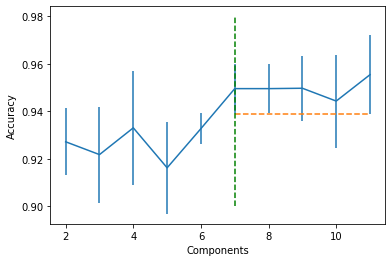

In [10]:
acc_tgt = acc_mean[imax] - acc_se[imax]
I = np.where(acc_mean >= acc_tgt)[0]
iopt = I[0]
dopt = ncomp_test[iopt]

plt.errorbar(ncomp_test, acc_mean, yerr=acc_se, fmt='-')
plt.plot([ncomp_test[iopt],ncomp_test[imax]], [acc_tgt, acc_tgt], '--')

plt.plot([dopt,dopt], [0.90,0.98],'g--')
plt.xlabel('Components')
plt.ylabel('Accuracy')
print("1 SE rule, order = %d" % dopt)
print('Accuracy:',acc_mean[iopt])

**Hyper-Parameter Optimization with GridCV**

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scaler = StandardScaler()
pca = PCA()
svc = SVC(kernel="rbf")
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])

In [12]:
ncomp_test=np.arange(3,11)
powers1=np.arange(-2,4)
c_test=pow(10.0,powers1)
powers2=np.arange(-3,2)
gam_test=pow(10.0,powers2)

In [13]:
params = {'pca__n_components': ncomp_test, 'svc__C' : c_test,'svc__gamma':gam_test}
estimator = GridSearchCV(pipe,params,cv=5, return_train_score=True, iid=False)
estimator.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                           

In [14]:
print('Best Score:',estimator.best_score_)
print('Best Parameter:',estimator.best_params_)

Best Score: 0.9777777777777779
Best Parameter: {'pca__n_components': 5, 'svc__C': 1.0, 'svc__gamma': 0.1}


[Text(0, 0, '0.001'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.1'),
 Text(0, 0, '1.0'),
 Text(0, 0, '10.0')]

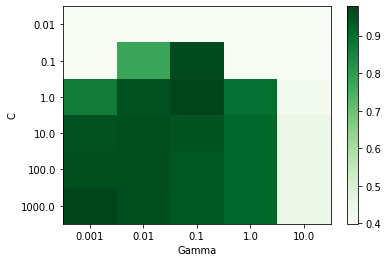

In [15]:
test_score = estimator.cv_results_['mean_test_score']
comp_five=test_score[60:90]

plt.imshow(comp_five.reshape(6,5), aspect='auto', cmap='Greens')
plt.ylabel('C')
plt.xlabel('Gamma')
plt.colorbar()

ax = plt.gca()
ax.set_yticks(np.arange(len(c_test)))
ax.set_yticklabels(c_test)
ax.set_xticks(np.arange(len(gam_test)))
ax.set_xticklabels(gam_test)